In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('finaldata.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,56,1,1,165,561,0,2,97,0,0.5,2,0,0,1
1,53,1,1,128,240,0,1,167,1,3.0,1,1,1,1
2,68,0,1,92,196,0,2,122,1,5.6,2,0,2,1
3,35,0,0,167,478,0,0,74,0,2.4,1,1,0,1
4,39,0,2,91,270,1,0,172,0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,48,0,1,178,517,0,1,152,0,2.3,0,2,0,0
99996,43,1,0,155,355,0,0,183,0,2.9,0,0,0,0
99997,71,0,0,92,164,0,0,88,0,1.6,1,0,0,1
99998,35,1,1,161,536,0,0,143,0,5.9,2,1,0,1


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,56,1,1,165,561,0,2,97,0,0.5,2,0,0,1
1,53,1,1,128,240,0,1,167,1,3.0,1,1,1,1
2,68,0,1,92,196,0,2,122,1,5.6,2,0,2,1
3,35,0,0,167,478,0,0,74,0,2.4,1,1,0,1
4,39,0,2,91,270,1,0,172,0,0.0,0,1,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age       100000 non-null  int64  
 1   sex       100000 non-null  int64  
 2   cp        100000 non-null  int64  
 3   trestbps  100000 non-null  int64  
 4   chol      100000 non-null  int64  
 5   fbs       100000 non-null  int64  
 6   restecg   100000 non-null  int64  
 7   thalach   100000 non-null  int64  
 8   exang     100000 non-null  int64  
 9   oldpeak   100000 non-null  float64
 10  slope     100000 non-null  int64  
 11  ca        100000 non-null  int64  
 12  thal      100000 non-null  int64  
 13  target    100000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 10.7 MB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,53.964870,0.499890,1.502540,134.297430,343.801200,0.151560,0.698290,136.235150,0.298300,3.097255,1.002160,0.604600,0.551390,0.749670
std,14.697924,0.500002,1.023125,25.970221,126.656594,0.358596,0.780889,37.840785,0.457514,1.794851,0.815427,0.861642,0.740935,0.433205
min,29.000000,0.000000,0.000000,90.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,112.000000,234.000000,0.000000,0.000000,103.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,2.000000,134.000000,343.000000,0.000000,0.000000,136.000000,0.000000,3.100000,1.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,2.000000,157.000000,453.000000,0.000000,1.000000,169.000000,1.000000,4.700000,2.000000,1.000000,1.000000,1.000000
max,79.000000,1.000000,3.000000,179.000000,563.000000,1.000000,2.000000,201.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [8]:
data["target"].describe()

count    100000.000000
mean          0.749670
std           0.433205
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: target, dtype: float64

In [9]:
data['target'].value_counts()

target
1    74967
0    25033
Name: count, dtype: int64

In [10]:
X = data.drop(columns=['target'])  
y = data['target']  

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((70000, 13), (30000, 13), (70000,), (30000,))

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [13]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

In [14]:
Y_pred_xgb.shape

(30000,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error


# **2. Random Forest Classifier**
rf_model = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

# **3. Support Vector Classifier (SVC)**
svc_model = SVC()
svc_model.fit(X_train, Y_train)
Y_pred_svc = svc_model.predict(X_test)
svc_accuracy = accuracy_score(Y_test, Y_pred_svc)
print(f"SVM Accuracy: {svc_accuracy}")

# **4. Decision Tree Classifier**
dt_model = DecisionTreeClassifier( max_depth=4, random_state=42)
dt_model.fit(X_train, Y_train)
Y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# **5. k-Nearest Neighbors (KNN)**
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(Y_test, Y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy}")

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
Y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(Y_test, Y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy}")


Linear Regression MSE: 0.11089394384564548
Linear Regression Accuracy: 0.8718
Random Forest Accuracy: 0.8492666666666666
SVM Accuracy: 0.7485666666666667
Decision Tree Accuracy: 0.8472666666666666
KNN Accuracy: 0.7399333333333333
Logistic Regression Accuracy: 0.8720666666666667


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 99.97 %


In [17]:
from keras.models import Sequential
from keras.layers import Dense

2025-04-14 10:36:06.659289: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 10:36:07.017219: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 10:36:07.161181: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744626967.347151   22684 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744626967.483538   22684 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-14 10:36:08.066474: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [18]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [19]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-14 10:36:13.038799: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
hist = model.fit(x_train, Y_train, batch_size=10, epochs=3)

Epoch 1/3


7000/7000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8720 - loss: 0.2801
Epoch 2/3
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9467 - loss: 0.1246
Epoch 3/3
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9567 - loss: 0.1014


In [22]:
loss,accuracy = model.evaluate(x_test,Y_test)
print("LOSS:  " + "%.2f" % loss)
print("ACCURACY:  " + "%.2f" % accuracy)

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.9699 - loss: 0.0736
LOSS:  0.08
ACCURACY:  0.97


In [23]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_train, Y_train, cv=5, scoring='accuracy')

# Print results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validation accuracy scores: [0.99985714 0.99971429 0.99985714 0.99978571 0.99978571]
Mean accuracy: 0.9998 ± 0.0001


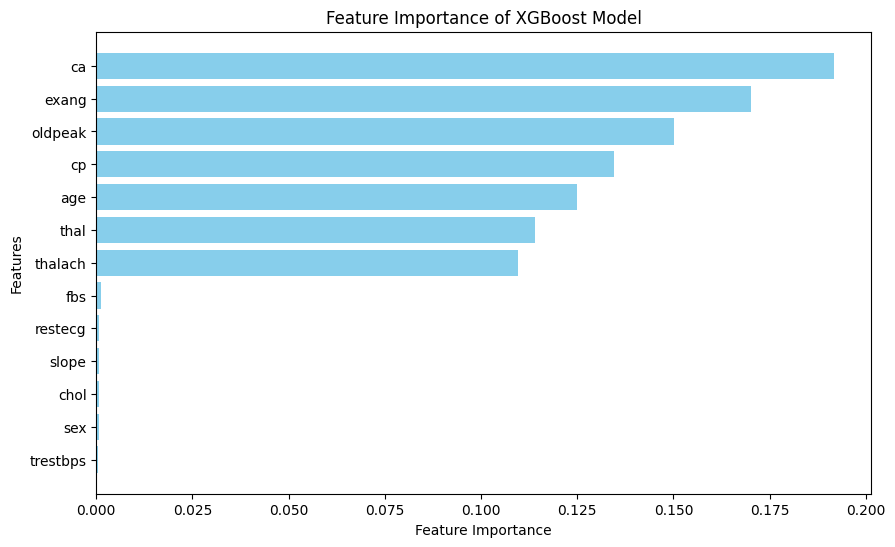

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Create a DataFrame
features_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances})
features_df = features_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df["Feature"], features_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance of XGBoost Model")
plt.gca().invert_yaxis()
plt.show()


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on test set
Y_pred_xgb = xgb_model.predict(X_test)

# Print Classification Report
print("Classification Report:\n", classification_report(Y_test, Y_pred_xgb))

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7543
           1       1.00      1.00      1.00     22457

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

Confusion Matrix:
 [[ 7542     1]
 [    7 22450]]


In [34]:
import pickle
with open("testxgb_model.pkl", "wb") as model_file:
    pickle.dump(xgb_model, model_file)

# Save the StandardScaler as well
with open("testscaler.pkl", "wb") as scaler_file:
    pickle.dump(sc, scaler_file)

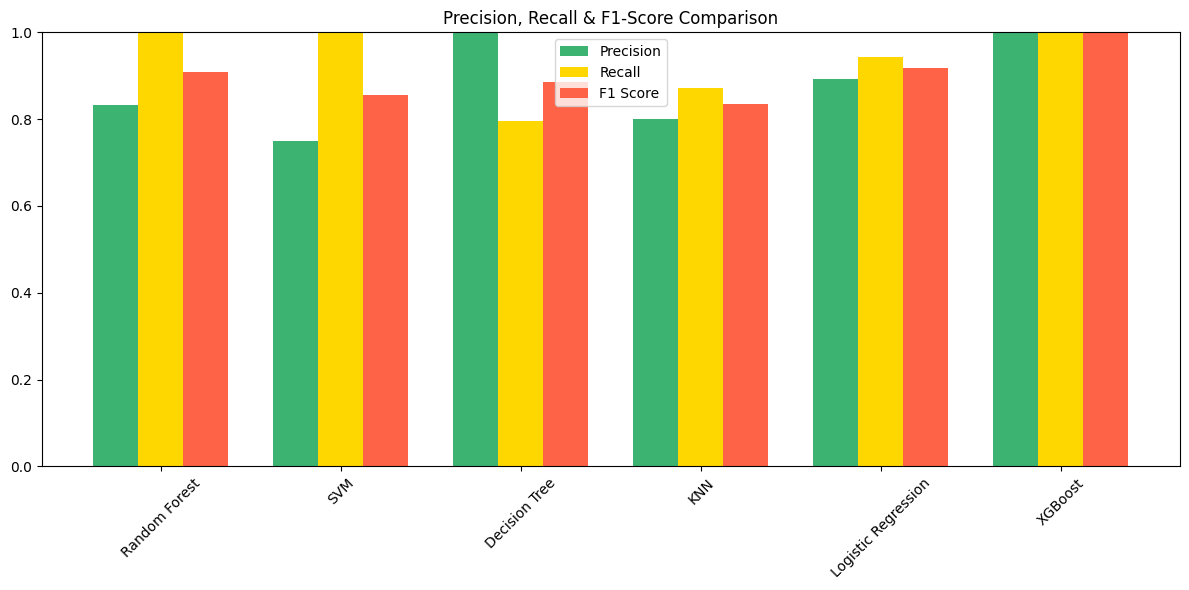

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Predictions
models = {
    'Random Forest': Y_pred_rf,
    'SVM': Y_pred_svc,
    'Decision Tree': Y_pred_dt,
    'KNN': Y_pred_knn,
    'Logistic Regression': Y_pred_log,
    'XGBoost': Y_pred_xgb
}
precision_vals, recall_vals, f1_vals = [], [], []
for name, y_pred in models.items():
    precision_vals.append(precision_score(Y_test, y_pred))
    recall_vals.append(recall_score(Y_test, y_pred))
    f1_vals.append(f1_score(Y_test, y_pred))
x = list(models.keys())
# Plot grouped bar chart
x_axis = range(len(x))
width = 0.25
plt.figure(figsize=(12, 6))
plt.bar([i - width for i in x_axis], precision_vals, width=width, label='Precision', color='mediumseagreen')
plt.bar(x_axis, recall_vals, width=width, label='Recall', color='gold')
plt.bar([i + width for i in x_axis], f1_vals, width=width, label='F1 Score', color='tomato')
plt.xticks(x_axis, x, rotation=45)
plt.ylim(0, 1)
plt.title("Precision, Recall & F1-Score Comparison")
plt.legend()
plt.tight_layout()
plt.show()